In [1]:
import os
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

In [2]:
#Explanation of a narrative approach in NarViz
#Sources:

#Raw Data
#Climate trends: https://ourworldindata.org/grapher/temperature-anomaly
#CO2 trends: https://ourworldindata.org/co2-emissions#global-co2-emissions-from-fossil-fuels

#x-limits
#Pre-industrial temperatures
#https://earthobservatory.nasa.gov/world-of-change/global-temperatures
#https://unfccc.int/process-and-meetings/the-paris-agreement

#y-limits
#https://www.europarl.europa.eu/infographic/climate-negotiations-timeline/index_en.html

#shaded periods
#https://faculty.wcas.northwestern.edu/jmokyr/castronovo.pdf
#https://www.anthroencyclopedia.com/entry/anthropocene#:~:text='The%20Anthropocene'%20is%20a%20term,bio%2Dgeophysical%20composition%20and%20processes.

#callouts
#https://www.history.com/news/most-important-gilded-age-inventions
#https://www.statista.com/statistics/1246890/vehicles-use-united-states-historical/
#https://www.discover.ukri.org/a-brief-history-of-climate-change-discoveries/index.html#group-section-1990s-2000s-bwnXtJHqpd



In [3]:
#reading in temperature data
temp_trends = pd.read_csv('temperature-anomaly.csv')

#reading in CO2 data
CO2_trends = pd.read_csv('annual-co2-emissions-per-country.csv')


In [4]:
print(temp_trends.head())
print(temp_trends.describe())

   Entity  Code  Year  \
0  Global   NaN  1850   
1  Global   NaN  1851   
2  Global   NaN  1852   
3  Global   NaN  1853   
4  Global   NaN  1854   

   Global average temperature anomaly relative to 1961-1990  \
0                                          -0.417659          
1                                          -0.233350          
2                                          -0.229399          
3                                          -0.270354          
4                                          -0.291630          

   Upper bound of the annual temperature anomaly (95% confidence interval)  \
0                                          -0.246115                         
1                                          -0.054832                         
2                                          -0.049416                         
3                                          -0.110700                         
4                                          -0.150436                         

 

In [5]:
#cleaning climate change data - restricted to world trends, removing rows with no temp anomoly data
climatechange_world = temp_trends[temp_trends['Entity']=='Global']

#filtering relevant columns
drop_cols = ['Entity','Code']
climatechange_world.drop(drop_cols,axis=1,inplace=True)

#renaming columns
rename_cols = {'Global average temperature anomaly relative to 1961-1990':'relative avg temp',
              'Upper bound of the annual temperature anomaly (95% confidence interval)':'upper bound',
              'Lower bound of the annual temperature anomaly (95% confidence interval)':'lower bound'}
climatechange_world.rename(columns=rename_cols,inplace=True)

#print df head
print(climatechange_world.head())

   Year  relative avg temp  upper bound  lower bound
0  1850          -0.417659    -0.246115    -0.589203
1  1851          -0.233350    -0.054832    -0.411868
2  1852          -0.229399    -0.049416    -0.409382
3  1853          -0.270354    -0.110700    -0.430009
4  1854          -0.291630    -0.150436    -0.432824


C:\Users\jlenehan\AppData\Local\Temp\ipykernel_30052\4068773569.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatechange_world.drop(drop_cols,axis=1,inplace=True)
C:\Users\jlenehan\AppData\Local\Temp\ipykernel_30052\4068773569.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climatechange_world.rename(columns=rename_cols,inplace=True)


In [6]:
print(CO2_trends[CO2_trends['Entity']=='World'].head())
print(CO2_trends[CO2_trends['Entity']=='World'].describe())

      Entity      Code  Year  Annual CO₂ emissions
30814  World  OWID_WRL  1750             9350528.0
30815  World  OWID_WRL  1751             9350528.0
30816  World  OWID_WRL  1752             9354192.0
30817  World  OWID_WRL  1753             9354192.0
30818  World  OWID_WRL  1754             9357856.0
              Year  Annual CO₂ emissions
count   272.000000          2.720000e+02
mean   1885.500000          6.385772e+09
std      78.663842          1.012492e+10
min    1750.000000          9.350528e+06
25%    1817.750000          4.959041e+07
50%    1885.500000          1.017573e+09
75%    1953.250000          6.683314e+09
max    2021.000000          3.712385e+10


In [7]:
#cleaning CO2 data - restricted to world trends, only taking years greater than 1879
CO2_world = CO2_trends[(CO2_trends['Entity']=='World') & (CO2_trends['Year']>1849)]

#filtering relevant columns
drop_cols = ['Entity','Code']
CO2_world.drop(drop_cols,axis=1,inplace=True)

#print df head
print(CO2_world.head())

       Year  Annual CO₂ emissions
30914  1850           196896030.0
30915  1851           198804980.0
30916  1852           207550940.0
30917  1853           217209250.0
30918  1854           255138980.0


C:\Users\jlenehan\AppData\Local\Temp\ipykernel_30052\3448753181.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  CO2_world.drop(drop_cols,axis=1,inplace=True)


In [8]:
#merging dataframes
climate_data = pd.merge(climatechange_world,CO2_world,on='Year',how='inner')

#adding actual temperature (1961-1990 mean temperature of 14 degrees)
climate_data['avg temp'] = climate_data['relative avg temp']+14

#adding column to convert CO2 emissions to billions of tonnes
climate_data['CO₂ emissions (billions of tonnes)'] = climate_data['Annual CO₂ emissions']/1e9

#dropping all entries after 2021
climate_data = climate_data[climate_data['Year']<2022]

#dropping unused columns
drop_cols=['relative avg temp','upper bound','lower bound','Annual CO₂ emissions']
climate_data.drop(drop_cols,axis=1,inplace=True)

print(climate_data.tail())

     Year   avg temp  CO₂ emissions (billions of tonnes)
167  2017  14.845174                           36.096737
168  2018  14.762654                           36.826510
169  2019  14.891073                           37.082560
170  2020  14.922794                           35.264086
171  2021  14.761856                           37.123850


# Leading Narrative

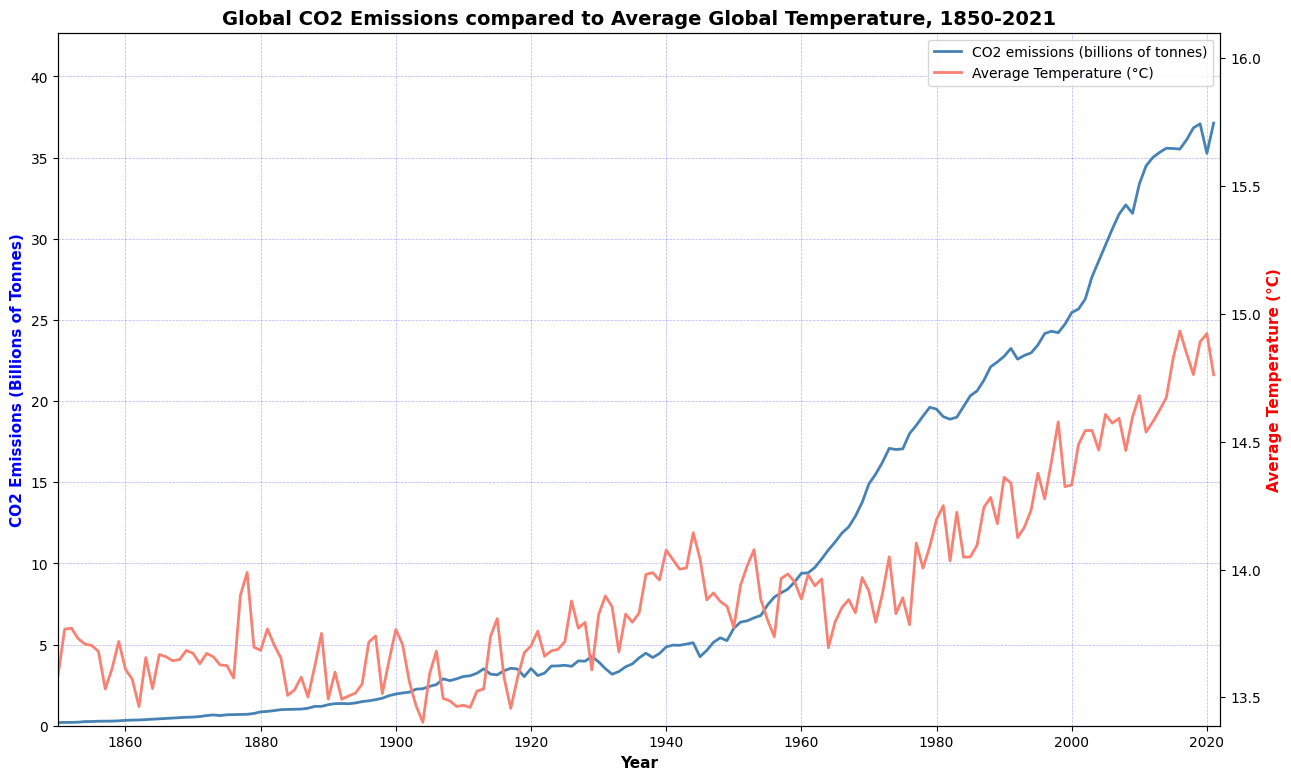

In [9]:
# Creating primary axis (CO2 emissions)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.plot(climate_data['Year'], climate_data['CO₂ emissions (billions of tonnes)'],
         color='steelblue',linewidth=2, label='CO2 emissions (billions of tonnes)')
ax1.set_xlabel('Year',weight='bold',fontsize=11)
ax1.set_ylabel('CO2 Emissions (Billions of Tonnes)',color='blue',weight='bold',fontsize=11)

# Adjusting gridlines on primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.3)

# Creating secondary y-axis (relative avg temp)
ax2 = ax1.twinx()
ax2.plot(climate_data['Year'], climate_data['avg temp'],
         color='salmon', linewidth=2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)',color='red',weight='bold',fontsize=11)

# Setting x-axis limits for ax
ax1.set_xlim(1850, 2022)

# Setting y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.15 * max(climate_data['CO₂ emissions (billions of tonnes)']))
ax2.set_ylim(0.999 * min(climate_data['avg temp']), 16.1)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',fontsize=10)
                 
# Set title
plt.title('Global CO2 Emissions compared to Average Global Temperature, 1850-2021',weight='bold',fontsize=14)

# Show plot
plt.show() 

### Adding Trendline

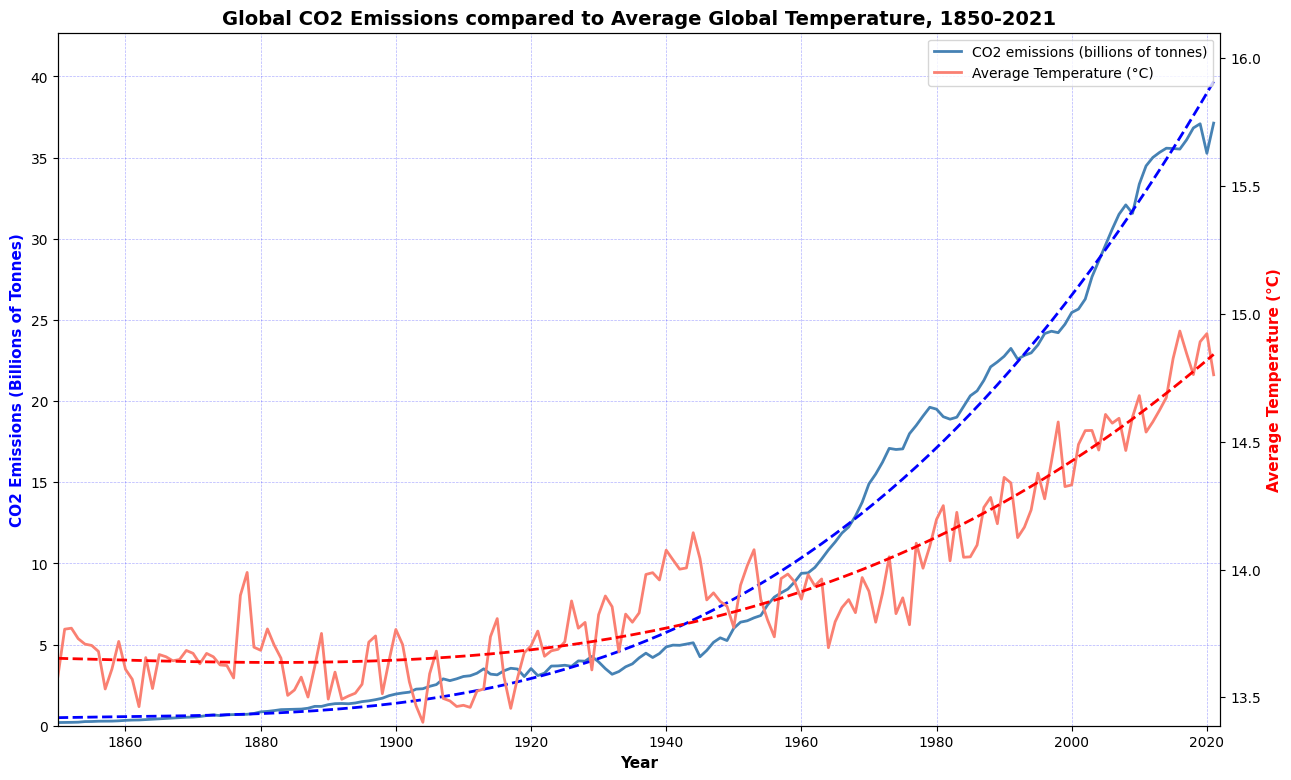

In [10]:
#Adding Anthropocene period
#https://www.discover.ukri.org/a-brief-history-of-climate-change-discoveries/index.html
#leading narrative - temperature & CO2 trends
# Creating primary axis (CO2 emissions)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.plot(climate_data['Year'], climate_data['CO₂ emissions (billions of tonnes)'],
         color='steelblue',linewidth=2, label='CO2 emissions (billions of tonnes)')
ax1.set_xlabel('Year',weight='bold',fontsize=11)
ax1.set_ylabel('CO2 Emissions (Billions of Tonnes)',color='blue',weight='bold',fontsize=11)

# Adjusting gridlines on primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.3)

# Creating secondary y-axis (relative avg temp)
ax2 = ax1.twinx()
ax2.plot(climate_data['Year'], climate_data['avg temp'],
         color='salmon', linewidth=2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)',color='red',weight='bold',fontsize=11)

# Setting x-axis limits for ax
ax1.set_xlim(1850, 2022)

# Setting y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.15 * max(climate_data['CO₂ emissions (billions of tonnes)']))
ax2.set_ylim(0.999 * min(climate_data['avg temp']), 16.1)

# Spline for CO2 data
theta1 = np.polyfit(climate_data['Year'], 
                    climate_data['CO₂ emissions (billions of tonnes)'],3)
CO2_spline = theta1[3]+theta1[2]*pow(climate_data['Year'],
                                     1)+theta1[1]*pow(climate_data['Year'],
                                                      2)+theta1[0]*pow(climate_data['Year'],3)

#plotting CO2 spline
ax1.plot(climate_data['Year'], CO2_spline,
         color='blue', linestyle ='dashed', linewidth=2, label=None)

# Spline for temp data
theta2 = np.polyfit(climate_data['Year'], 
                    climate_data['avg temp'],3)
temp_spline = theta2[3]+theta2[2]*pow(climate_data['Year'],
                                      1)+theta2[1]*pow(climate_data['Year'],
                                                       2)+theta2[0]*pow(climate_data['Year'],3)

#plotting temp spline
ax2.plot(climate_data['Year'], temp_spline,
         color='red', linestyle ='dashed', linewidth=2, label=None)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',fontsize=10)
                 
# Set title
plt.title('Global CO2 Emissions compared to Average Global Temperature, 1850-2021',weight='bold',fontsize=14)

# Show plot
plt.show() 

### Adding x-limits

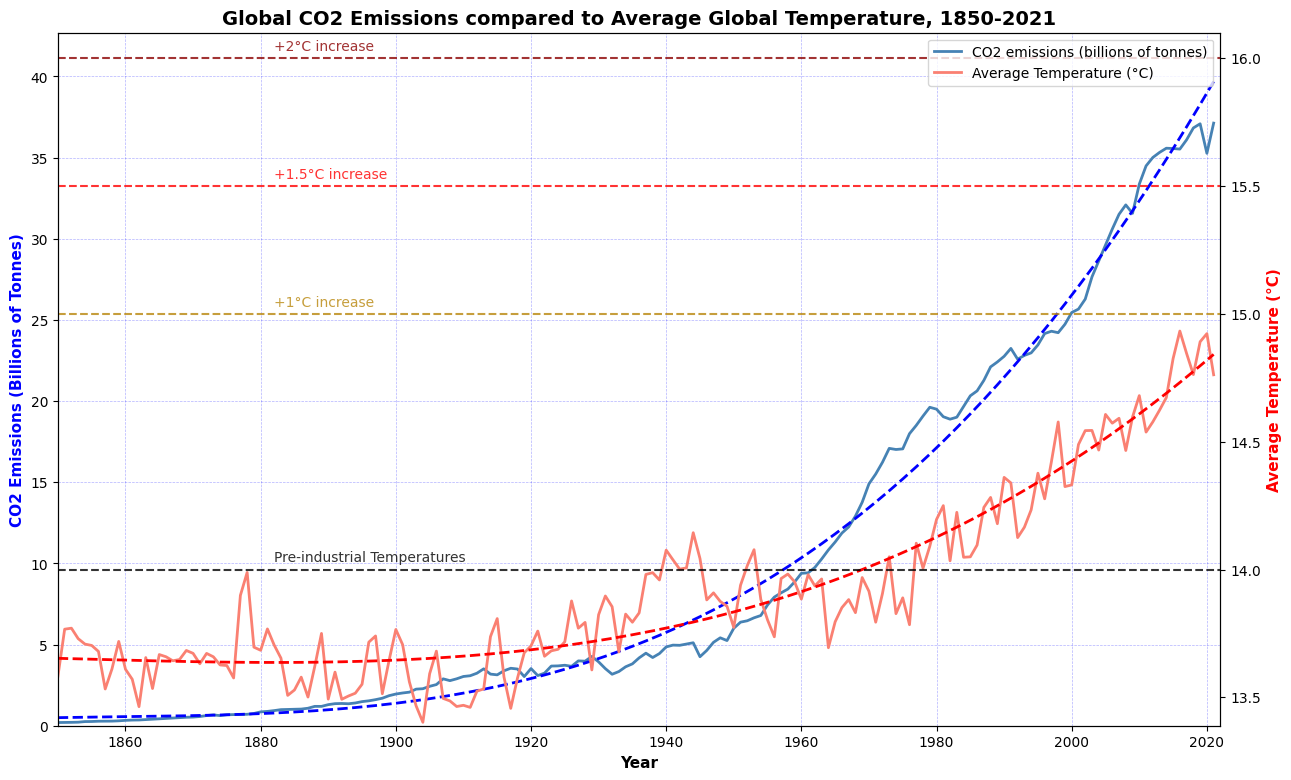

In [11]:
#Adding Anthropocene period
#https://www.discover.ukri.org/a-brief-history-of-climate-change-discoveries/index.html
#leading narrative - temperature & CO2 trends
# Creating primary axis (CO2 emissions)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.plot(climate_data['Year'], climate_data['CO₂ emissions (billions of tonnes)'],
         color='steelblue',linewidth=2, label='CO2 emissions (billions of tonnes)')
ax1.set_xlabel('Year',weight='bold',fontsize=11)
ax1.set_ylabel('CO2 Emissions (Billions of Tonnes)',color='blue',weight='bold',fontsize=11)

# Adjusting gridlines on primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.3)

# Creating secondary y-axis (relative avg temp)
ax2 = ax1.twinx()
ax2.plot(climate_data['Year'], climate_data['avg temp'],
         color='salmon', linewidth=2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)',color='red',weight='bold',fontsize=11)

# Setting x-axis limits for ax
ax1.set_xlim(1850, 2022)

# Setting y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.15 * max(climate_data['CO₂ emissions (billions of tonnes)']))
ax2.set_ylim(0.999 * min(climate_data['avg temp']), 16.1)

# Spline for CO2 data
theta1 = np.polyfit(climate_data['Year'], 
                    climate_data['CO₂ emissions (billions of tonnes)'],3)
CO2_spline = theta1[3]+theta1[2]*pow(climate_data['Year'],
                                     1)+theta1[1]*pow(climate_data['Year'],
                                                      2)+theta1[0]*pow(climate_data['Year'],3)

#plotting CO2 spline
ax1.plot(climate_data['Year'], CO2_spline,
         color='blue', linestyle ='dashed', linewidth=2, label=None)

# Spline for temp data
theta2 = np.polyfit(climate_data['Year'], 
                    climate_data['avg temp'],3)
temp_spline = theta2[3]+theta2[2]*pow(climate_data['Year'],
                                      1)+theta2[1]*pow(climate_data['Year'],
                                                       2)+theta2[0]*pow(climate_data['Year'],3)

#plotting temp spline
ax2.plot(climate_data['Year'], temp_spline,
         color='red', linestyle ='dashed', linewidth=2, label=None)

#Constant lines
#setting constant line transparency
cnst_alpha=0.8

# Adding horizontal constant line at 14C (pre-industrial mean temp)
#https://earthobservatory.nasa.gov/world-of-change/global-temperatures
ax2.axhline(y=14, color='black', linestyle='--',alpha=cnst_alpha)
pre_ind_label = 'Pre-industrial Temperatures'
ax2.text(1882,14.03,pre_ind_label,color='black',alpha=cnst_alpha)

#Adding horizontal constant line at 15.5C (+1.5C Mean Temp)
ax2.axhline(y=15, color='darkgoldenrod', linestyle='--',alpha=cnst_alpha)
increase_label1 = '+1°C increase'
ax2.text(1882,15.03,increase_label1,color='darkgoldenrod',alpha=cnst_alpha)

# Adding horizontal constant line at 15C (+1C mean temp)
ax2.axhline(y=15.5, color='red', linestyle='--',alpha=cnst_alpha)
increase_label2 = '+1.5°C increase'
ax2.text(1882,15.53,increase_label2,color='red',alpha=cnst_alpha)

#Adding horizontal constant line at 16C (+2C Mean Temp)
ax2.axhline(y=16, color='darkred', linestyle='--',alpha=cnst_alpha)
increase_label3 = '+2°C increase'
ax2.text(1882,16.03,increase_label3,color='darkred',alpha=cnst_alpha)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',fontsize=10)
                 
# Set title
plt.title('Global CO2 Emissions compared to Average Global Temperature, 1850-2021',weight='bold',fontsize=14)

# Show plot
plt.show() 

### Adding y-limits

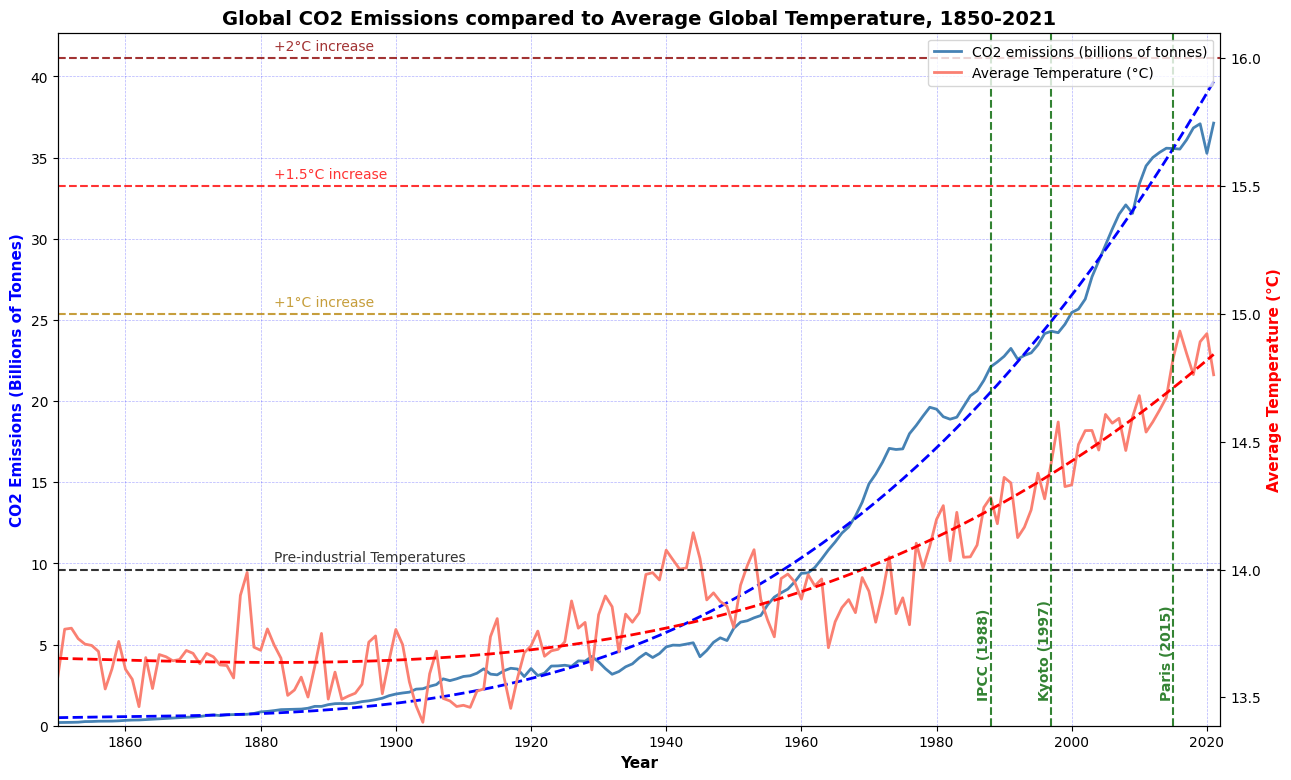

In [12]:
# Creating primary axis (CO2 emissions)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.plot(climate_data['Year'], climate_data['CO₂ emissions (billions of tonnes)'],
         color='steelblue',linewidth=2, label='CO2 emissions (billions of tonnes)')
ax1.set_xlabel('Year',weight='bold',fontsize=11)
ax1.set_ylabel('CO2 Emissions (Billions of Tonnes)',color='blue',weight='bold',fontsize=11)

# Adjusting gridlines on primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.3)

# Creating secondary y-axis (relative avg temp)
ax2 = ax1.twinx()
ax2.plot(climate_data['Year'], climate_data['avg temp'],
         color='salmon', linewidth=2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)',color='red',weight='bold',fontsize=11)

# Setting x-axis limits for ax
ax1.set_xlim(1850, 2022)

# Setting y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.15 * max(climate_data['CO₂ emissions (billions of tonnes)']))
ax2.set_ylim(0.999 * min(climate_data['avg temp']), 16.1)

# Spline for CO2 data
theta1 = np.polyfit(climate_data['Year'], 
                    climate_data['CO₂ emissions (billions of tonnes)'],3)
CO2_spline = theta1[3]+theta1[2]*pow(climate_data['Year'],
                                     1)+theta1[1]*pow(climate_data['Year'],
                                                      2)+theta1[0]*pow(climate_data['Year'],3)

#plotting CO2 spline
ax1.plot(climate_data['Year'], CO2_spline,
         color='blue', linestyle ='dashed', linewidth=2, label=None)

# Spline for temp data
theta2 = np.polyfit(climate_data['Year'], 
                    climate_data['avg temp'],3)
temp_spline = theta2[3]+theta2[2]*pow(climate_data['Year'],
                                      1)+theta2[1]*pow(climate_data['Year'],
                                                       2)+theta2[0]*pow(climate_data['Year'],3)

#plotting temp spline
ax2.plot(climate_data['Year'], temp_spline,
         color='red', linestyle ='dashed', linewidth=2, label=None)

#Constant lines
#setting constant line transparency
cnst_alpha=0.8

# Adding horizontal constant line at 14C (pre-industrial mean temp)
#https://earthobservatory.nasa.gov/world-of-change/global-temperatures
ax2.axhline(y=14, color='black', linestyle='--',alpha=cnst_alpha)
pre_ind_label = 'Pre-industrial Temperatures'
ax2.text(1882,14.03,pre_ind_label,color='black',alpha=cnst_alpha)

#Adding horizontal constant line at 15.5C (+1.5C Mean Temp)
ax2.axhline(y=15, color='darkgoldenrod', linestyle='--',alpha=cnst_alpha)
increase_label1 = '+1°C increase'
ax2.text(1882,15.03,increase_label1,color='darkgoldenrod',alpha=cnst_alpha)

# Adding horizontal constant line at 15C (+1C mean temp)
ax2.axhline(y=15.5, color='red', linestyle='--',alpha=cnst_alpha)
increase_label2 = '+1.5°C increase'
ax2.text(1882,15.53,increase_label2,color='red',alpha=cnst_alpha)

#Adding horizontal constant line at 16C (+2C Mean Temp)
ax2.axhline(y=16, color='darkred', linestyle='--',alpha=cnst_alpha)
increase_label3 = '+2°C increase'
ax2.text(1882,16.03,increase_label3,color='darkred',alpha=cnst_alpha)

#Adding vertical constant line at 1988 (IPCC)
plt.axvline(x=1988, color='darkgreen',linestyle='--',alpha=cnst_alpha)
IPCC_label='IPCC (1988)'
ax2.text(1986,13.5,IPCC_label,color='darkgreen',weight='bold',fontsize=10,rotation=90,alpha=cnst_alpha)

#Adding vertical constant line at 1995 (Kyoto)
plt.axvline(x=1997, color='darkgreen',linestyle='--',alpha=cnst_alpha)
kyoto_label='Kyoto (1997)'
ax2.text(1995,13.5,kyoto_label,color='darkgreen',weight='bold',fontsize=10,rotation=90,alpha=cnst_alpha)

#Adding vertical constant line at 2015 (Paris)
plt.axvline(x=2015, color='darkgreen',linestyle='--',alpha=cnst_alpha)
paris_label='Paris (2015)'
ax2.text(2013,13.5,paris_label,color='darkgreen',weight='bold', fontsize=10,rotation=90,alpha=cnst_alpha)

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',fontsize=10)
                 
# Set title
plt.title('Global CO2 Emissions compared to Average Global Temperature, 1850-2021',weight='bold',fontsize=14)

# Show plot
plt.show() 

### Adding shaded periods 

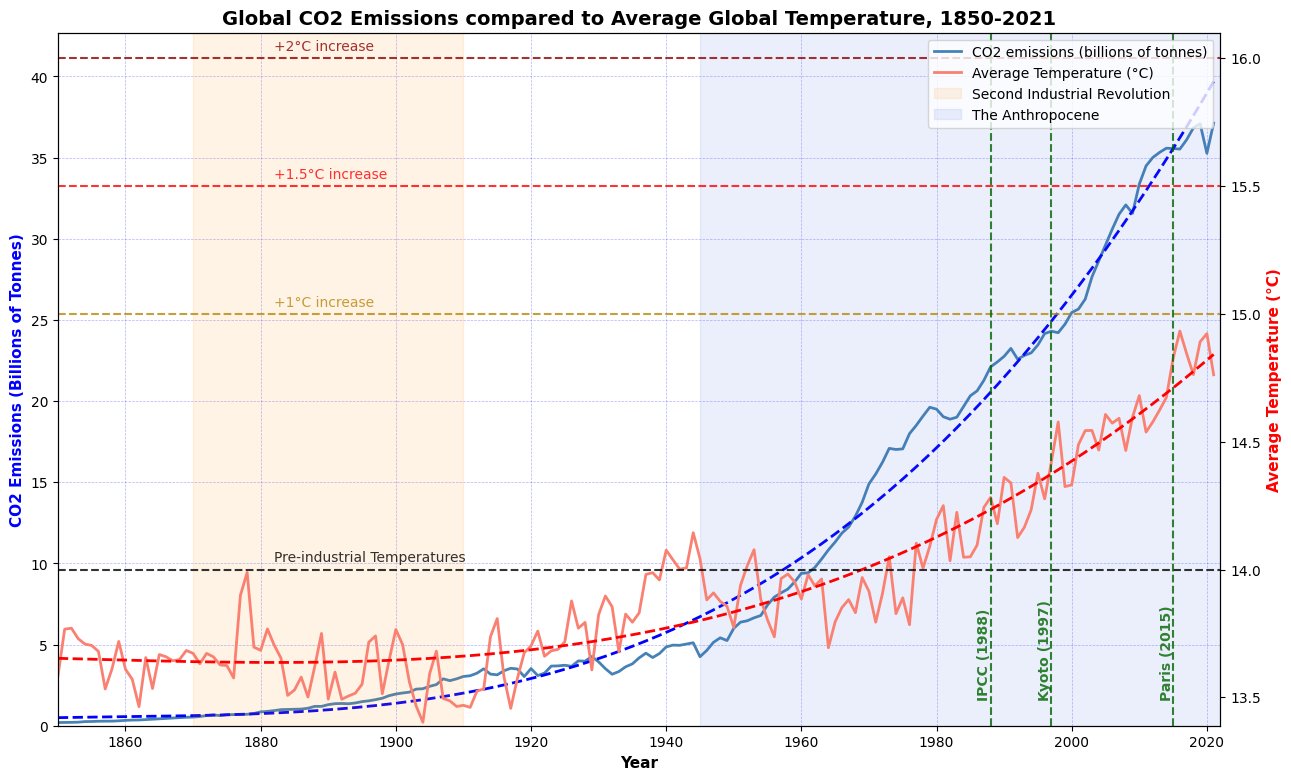

In [19]:
# Creating primary axis (CO2 emissions)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.plot(climate_data['Year'], climate_data['CO₂ emissions (billions of tonnes)'],
         color='steelblue',linewidth=2, label='CO2 emissions (billions of tonnes)')
ax1.set_xlabel('Year',weight='bold',fontsize=11)
ax1.set_ylabel('CO2 Emissions (Billions of Tonnes)',color='blue',weight='bold',fontsize=11)

# Adjusting gridlines on primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.3)

# Creating secondary y-axis (relative avg temp)
ax2 = ax1.twinx()
ax2.plot(climate_data['Year'], climate_data['avg temp'],
         color='salmon', linewidth=2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)',color='red',weight='bold',fontsize=11)

# Setting x-axis limits for ax
ax1.set_xlim(1850, 2022)

# Setting y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.15 * max(climate_data['CO₂ emissions (billions of tonnes)']))
ax2.set_ylim(0.999 * min(climate_data['avg temp']), 16.1)

# Spline for CO2 data
theta1 = np.polyfit(climate_data['Year'], 
                    climate_data['CO₂ emissions (billions of tonnes)'],3)
CO2_spline = theta1[3]+theta1[2]*pow(climate_data['Year'],
                                     1)+theta1[1]*pow(climate_data['Year'],
                                                      2)+theta1[0]*pow(climate_data['Year'],3)

#plotting CO2 spline
ax1.plot(climate_data['Year'], CO2_spline,
         color='blue', linestyle ='dashed', linewidth=2, label=None)

# Spline for temp data
theta2 = np.polyfit(climate_data['Year'], 
                    climate_data['avg temp'],3)
temp_spline = theta2[3]+theta2[2]*pow(climate_data['Year'],
                                      1)+theta2[1]*pow(climate_data['Year'],
                                                       2)+theta2[0]*pow(climate_data['Year'],3)

#plotting temp spline
ax2.plot(climate_data['Year'], temp_spline,
         color='red', linestyle ='dashed', linewidth=2, label=None)

#Constant lines
#setting constant line transparency
cnst_alpha=0.8

# Adding horizontal constant line at 14C (pre-industrial mean temp)
#https://earthobservatory.nasa.gov/world-of-change/global-temperatures
ax2.axhline(y=14, color='black', linestyle='--',alpha=cnst_alpha)
pre_ind_label = 'Pre-industrial Temperatures'
ax2.text(1882,14.03,pre_ind_label,color='black',alpha=cnst_alpha)

#Adding horizontal constant line at 15.5C (+1.5C Mean Temp)
ax2.axhline(y=15, color='darkgoldenrod', linestyle='--',alpha=cnst_alpha)
increase_label1 = '+1°C increase'
ax2.text(1882,15.03,increase_label1,color='darkgoldenrod',alpha=cnst_alpha)

# Adding horizontal constant line at 15C (+1C mean temp)
ax2.axhline(y=15.5, color='red', linestyle='--',alpha=cnst_alpha)
increase_label2 = '+1.5°C increase'
ax2.text(1882,15.53,increase_label2,color='red',alpha=cnst_alpha)

#Adding horizontal constant line at 16C (+2C Mean Temp)
ax2.axhline(y=16, color='darkred', linestyle='--',alpha=cnst_alpha)
increase_label3 = '+2°C increase'
ax2.text(1882,16.03,increase_label3,color='darkred',alpha=cnst_alpha)

#Adding vertical constant line at 1988 (IPCC)
plt.axvline(x=1988, color='darkgreen',linestyle='--',alpha=cnst_alpha)
IPCC_label='IPCC (1988)'
ax2.text(1986,13.5,IPCC_label,color='darkgreen',weight='bold',fontsize=10,rotation=90,alpha=cnst_alpha)

#Adding vertical constant line at 1995 (Kyoto)
plt.axvline(x=1997, color='darkgreen',linestyle='--',alpha=cnst_alpha)
kyoto_label='Kyoto (1997)'
ax2.text(1995,13.5,kyoto_label,color='darkgreen',weight='bold',fontsize=10,rotation=90,alpha=cnst_alpha)

#Adding vertical constant line at 2015 (Paris)
plt.axvline(x=2015, color='darkgreen',linestyle='--',alpha=cnst_alpha)
paris_label='Paris (2015)'
ax2.text(2013,13.5,paris_label,color='darkgreen',weight='bold', fontsize=10,rotation=90,alpha=cnst_alpha)

# Specifying regions to shade on the x-axis
plt.axvspan(1870, 1910, alpha=0.1, color='darkorange', 
            label='Second Industrial Revolution')
plt.axvspan(1945, 2022, alpha=0.1, color='royalblue', 
            label='The Anthropocene')

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',fontsize=10)
                 
# Set title
plt.title('Global CO2 Emissions compared to Average Global Temperature, 1850-2021',weight='bold',fontsize=14)

# Show plot
plt.show() 

### Adding callouts

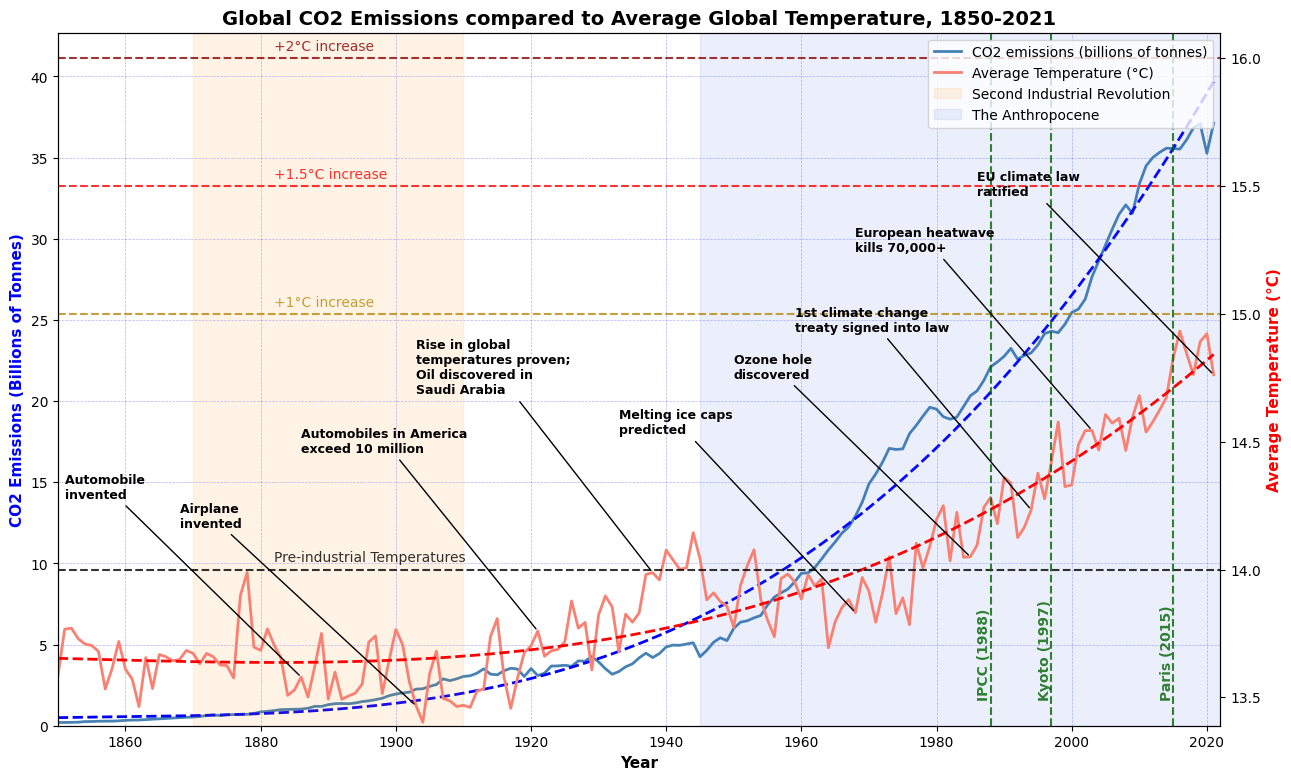

In [20]:
# Creating primary axis (CO2 emissions)
fig, ax1 = plt.subplots(figsize=(15, 9))
ax1.plot(climate_data['Year'], climate_data['CO₂ emissions (billions of tonnes)'],
         color='steelblue',linewidth=2, label='CO2 emissions (billions of tonnes)')
ax1.set_xlabel('Year',weight='bold',fontsize=11)
ax1.set_ylabel('CO2 Emissions (Billions of Tonnes)',color='blue',weight='bold',fontsize=11)

# Adjusting gridlines on primary y-axis
ax1.grid(color='blue', linestyle='--', linewidth=0.5, alpha=0.3)

# Creating secondary y-axis (relative avg temp)
ax2 = ax1.twinx()
ax2.plot(climate_data['Year'], climate_data['avg temp'],
         color='salmon', linewidth=2, label='Average Temperature (°C)')
ax2.set_ylabel('Average Temperature (°C)',color='red',weight='bold',fontsize=11)

# Setting x-axis limits for ax
ax1.set_xlim(1850, 2022)

# Setting y-axis limits for both ax1 and ax2
ax1.set_ylim(0, 1.15 * max(climate_data['CO₂ emissions (billions of tonnes)']))
ax2.set_ylim(0.999 * min(climate_data['avg temp']), 16.1)

# Spline for CO2 data
theta1 = np.polyfit(climate_data['Year'], 
                    climate_data['CO₂ emissions (billions of tonnes)'],3)
CO2_spline = theta1[3]+theta1[2]*pow(climate_data['Year'],
                                     1)+theta1[1]*pow(climate_data['Year'],
                                                      2)+theta1[0]*pow(climate_data['Year'],3)

#plotting CO2 spline
ax1.plot(climate_data['Year'], CO2_spline,
         color='blue', linestyle ='dashed', linewidth=2, label=None)

# Spline for temp data
theta2 = np.polyfit(climate_data['Year'], 
                    climate_data['avg temp'],3)
temp_spline = theta2[3]+theta2[2]*pow(climate_data['Year'],
                                      1)+theta2[1]*pow(climate_data['Year'],
                                                       2)+theta2[0]*pow(climate_data['Year'],3)

#plotting temp spline
ax2.plot(climate_data['Year'], temp_spline,
         color='red', linestyle ='dashed', linewidth=2, label=None)

#Constant lines
#setting constant line transparency
cnst_alpha=0.8

# Adding horizontal constant line at 14C (pre-industrial mean temp)
#https://earthobservatory.nasa.gov/world-of-change/global-temperatures
ax2.axhline(y=14, color='black', linestyle='--',alpha=cnst_alpha)
pre_ind_label = 'Pre-industrial Temperatures'
ax2.text(1882,14.03,pre_ind_label,color='black',alpha=cnst_alpha)

#Adding horizontal constant line at 15.5C (+1.5C Mean Temp)
ax2.axhline(y=15, color='darkgoldenrod', linestyle='--',alpha=cnst_alpha)
increase_label1 = '+1°C increase'
ax2.text(1882,15.03,increase_label1,color='darkgoldenrod',alpha=cnst_alpha)

# Adding horizontal constant line at 15C (+1C mean temp)
ax2.axhline(y=15.5, color='red', linestyle='--',alpha=cnst_alpha)
increase_label2 = '+1.5°C increase'
ax2.text(1882,15.53,increase_label2,color='red',alpha=cnst_alpha)

#Adding horizontal constant line at 16C (+2C Mean Temp)
ax2.axhline(y=16, color='darkred', linestyle='--',alpha=cnst_alpha)
increase_label3 = '+2°C increase'
ax2.text(1882,16.03,increase_label3,color='darkred',alpha=cnst_alpha)

#Adding vertical constant line at 1988 (IPCC)
plt.axvline(x=1988, color='darkgreen',linestyle='--',alpha=cnst_alpha)
IPCC_label='IPCC (1988)'
ax2.text(1986,13.5,IPCC_label,color='darkgreen',weight='bold',fontsize=10,rotation=90,alpha=cnst_alpha)

#Adding vertical constant line at 1995 (Kyoto)
plt.axvline(x=1997, color='darkgreen',linestyle='--',alpha=cnst_alpha)
kyoto_label='Kyoto (1997)'
ax2.text(1995,13.5,kyoto_label,color='darkgreen',weight='bold',fontsize=10,rotation=90,alpha=cnst_alpha)

#Adding vertical constant line at 2015 (Paris)
plt.axvline(x=2015, color='darkgreen',linestyle='--',alpha=cnst_alpha)
paris_label='Paris (2015)'
ax2.text(2013,13.5,paris_label,color='darkgreen',weight='bold', fontsize=10,rotation=90,alpha=cnst_alpha)

# Specify the regions to shade on the x-axis
#https://www.nature.com/articles/d41586-019-01641-5
plt.axvspan(1870, 1910, alpha=0.1, color='darkorange', label='Second Industrial Revolution')
plt.axvspan(1945, 2022, alpha=0.1, color='royalblue', label='The Anthropocene')

# Combining legends for both axes
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right',fontsize=10)

#adding callouts for key dates
# Points to annotate (x, y, annotation_text)
callouts = [(1886, climate_data.loc[climate_data['Year'] == 1886, 'avg temp'].values[0], 'Automobile \ninvented'),
            (1903, climate_data.loc[climate_data['Year'] == 1903, 'avg temp'].values[0], 'Airplane \ninvented'),
            (1921, climate_data.loc[climate_data['Year'] == 1921, 'avg temp'].values[0], 'Automobiles in America\nexceed 10 million'),
            (1938, climate_data.loc[climate_data['Year'] == 1938, 'avg temp'].values[0], 'Rise in global\ntemperatures proven;\nOil discovered in\nSaudi Arabia'), 
            (1968, climate_data.loc[climate_data['Year'] == 1968, 'avg temp'].values[0], 'Melting ice caps \npredicted'), 
            (1985, climate_data.loc[climate_data['Year'] == 1985, 'avg temp'].values[0], 'Ozone hole \ndiscovered'),
            (1994, climate_data.loc[climate_data['Year'] == 1994, 'avg temp'].values[0], '1st climate change \ntreaty signed into law'),
            (2003, climate_data.loc[climate_data['Year'] == 2003, 'avg temp'].values[0], 'European heatwave \nkills 70,000+'),
            (2021, climate_data.loc[climate_data['Year'] == 2021, 'avg temp'].values[0], 'EU climate law\nratified')
           ]

# Iterate over specified points and add minimal annotations
for point in callouts:
    x_point, y_point, annotation_text = point
    ax2.annotate(annotation_text, xy=(x_point, y_point), xytext=(x_point - 35, y_point + 0.7),
                 arrowprops=dict(arrowstyle='-', color='black'),
                 fontsize=9, weight='bold')  # Set font size for annotation text
                 
# Set title
plt.title('Global CO2 Emissions compared to Average Global Temperature, 1850-2021',weight='bold',fontsize=14)

# Show plot
plt.show() 